In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.set_printoptions(precision=3, suppress=True)

In [51]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## Load data

In [11]:
raw_dataset = pd.read_csv("../Data/wifi_localization.txt",
                          sep='\t',
                          names=['wifi1', 'wifi2', 'wifi3', 'wifi4', 'wifi5', 'wifi6', 'wifi7', 'room'])

In [27]:
dataset = raw_dataset.copy()
dataset.tail()

,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,room
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4
1999,-59,-50,-45,-60,-45,-88,-87,4


## EDA

### Show shape of the data

In [28]:
dataset.shape

(2000, 8)

### Show info of the data

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   wifi1   2000 non-null   int64
 1   wifi2   2000 non-null   int64
 2   wifi3   2000 non-null   int64
 3   wifi4   2000 non-null   int64
 4   wifi5   2000 non-null   int64
 5   wifi6   2000 non-null   int64
 6   wifi7   2000 non-null   int64
 7   room    2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


### Count the non-missing value

In [30]:
dataset.count()

wifi1    2000
wifi2    2000
wifi3    2000
wifi4    2000
wifi5    2000
wifi6    2000
wifi7    2000
room     2000
dtype: int64

### Describe statistic

In [31]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
wifi1,2000.0,-52.3305,11.321677,-74.0,-61.00,-55.0,-46.00,-10.0
wifi2,2000.0,-55.6235,3.417688,-74.0,-58.00,-56.0,-53.00,-45.0
wifi3,2000.0,-54.9640,5.316186,-73.0,-58.00,-55.0,-51.00,-40.0
wifi4,2000.0,-53.5665,11.471982,-77.0,-63.00,-56.0,-46.00,-11.0
wifi5,2000.0,-62.6405,9.105093,-89.0,-69.00,-64.0,-56.00,-36.0
wifi6,2000.0,-80.9850,6.516672,-97.0,-86.00,-82.0,-77.00,-61.0
wifi7,2000.0,-81.7265,6.519812,-98.0,-87.00,-83.0,-78.00,-63.0
room,2000.0,2.5000,1.118314,1.0,1.75,2.5,3.25,4.0


### Numeric distribution

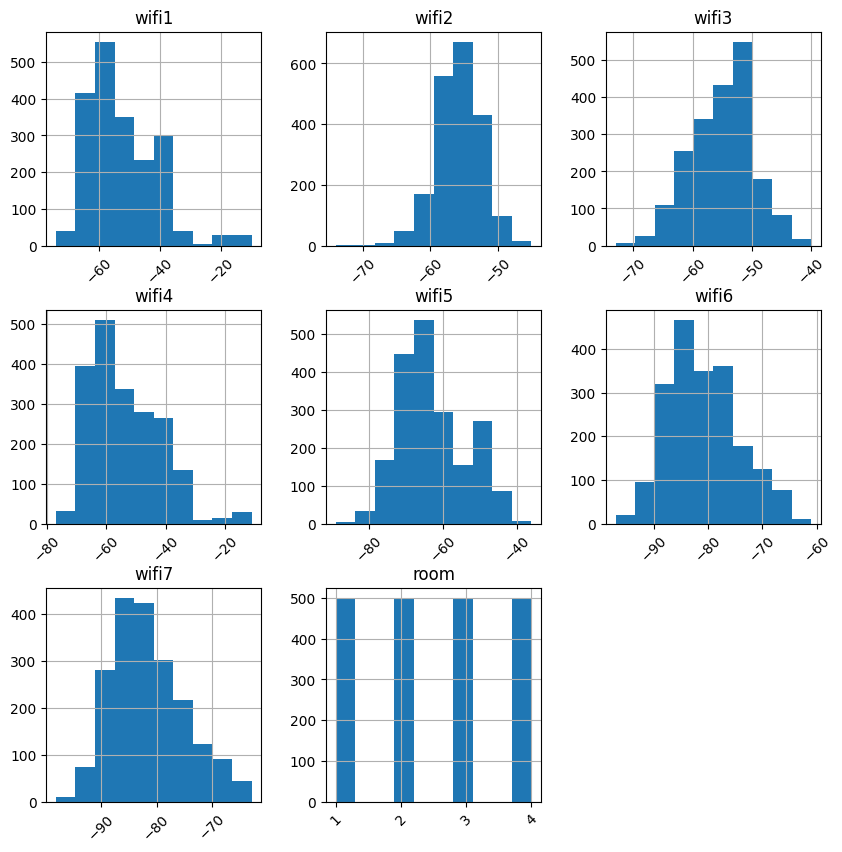

In [32]:
dataset.hist(figsize=(10,10), xrot=45)
plt.show()

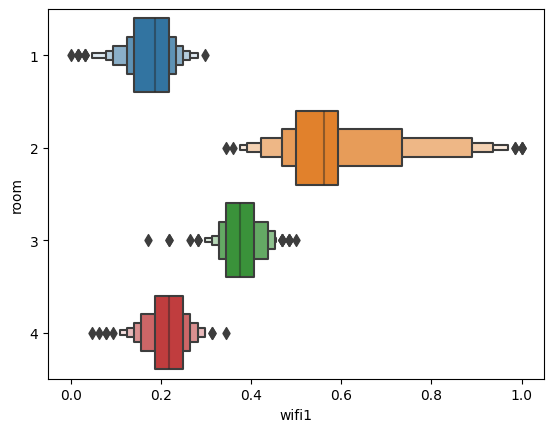

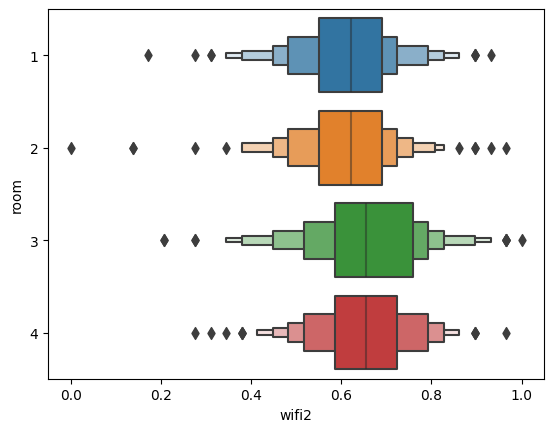

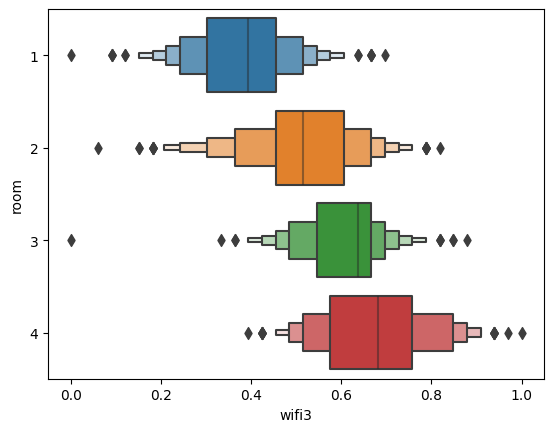

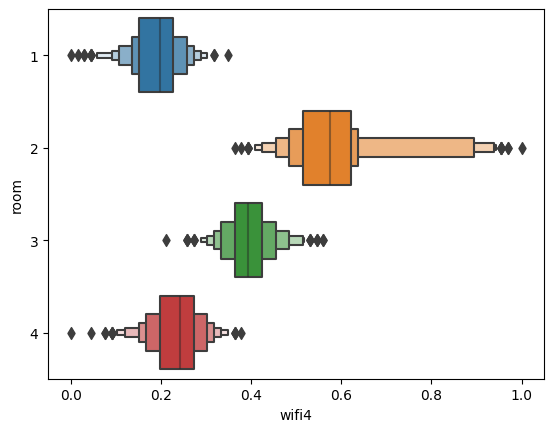

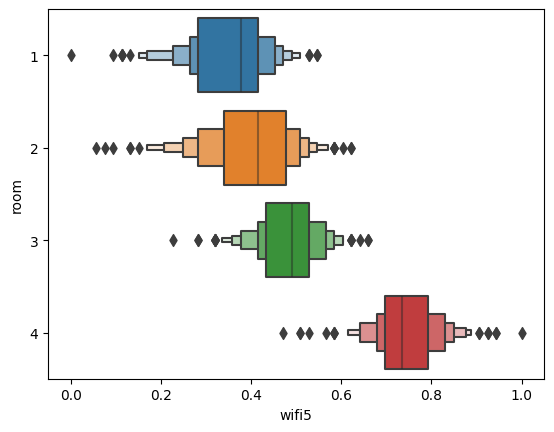

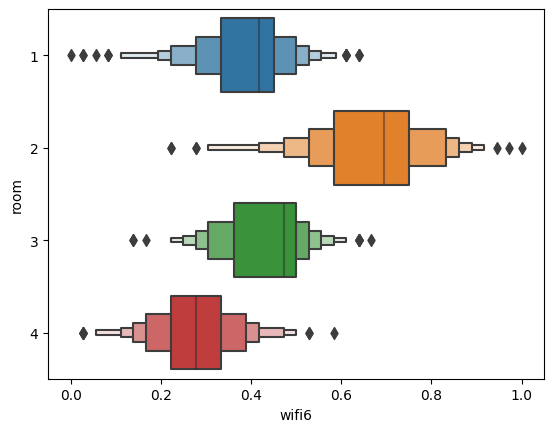

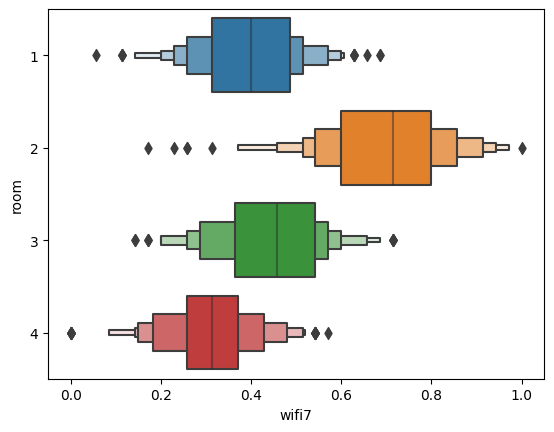

In [46]:
for col in dataset.select_dtypes('float64'):
    sns.boxenplot(y = dataset['room'].astype('category'),
                 x = col,
                 data=dataset)
    plt.show()

## Preprocessing

### Split features and label

In [35]:
features = dataset.copy()
label = features.pop('room')

In [40]:
features = MinMaxScaler().fit_transform(features)

In [43]:
dataset = pd.DataFrame(features, columns=['wifi1', 'wifi2', 'wifi3', 'wifi4', 'wifi5', 'wifi6', 'wifi7'])
dataset['room'] = label

In [44]:
dataset

,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,room
0,0.156250,0.620690,0.363636,0.166667,0.339623,0.416667,0.485714,1
1,0.093750,0.586207,0.363636,0.181818,0.339623,0.333333,0.371429,1
2,0.171875,0.482759,0.393939,0.151515,0.245283,0.333333,0.400000,1
3,0.203125,0.482759,0.151515,0.227273,0.226415,0.194444,0.514286,1
4,0.171875,0.310345,0.393939,0.212121,0.226415,0.444444,0.314286,1
...,...,...,...,...,...,...,...,...
1995,0.234375,0.517241,0.757576,0.166667,0.735849,0.305556,0.114286,4
1996,0.234375,0.620690,0.696970,0.227273,0.792453,0.277778,0.228571,4
1997,0.187500,0.517241,0.818182,0.181818,0.830189,0.277778,0.285714,4
1998,0.187500,0.551724,0.636364,0.242424,0.905660,0.194444,0.371429,4


### Train/Test split

In [47]:
train_dataset = dataset.sample(frac=0.8, random_state=42)
test_dataset = dataset.drop(train_dataset.index)

In [48]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop("room").astype('category')
test_labels = test_features.pop("room").astype('category')

## Modeling

### Decision tree

In [52]:
clf = DecisionTreeClassifier(random_state=42)

cross_val_score(clf, dataset.drop(columns='room'), dataset['room'])

array([0.96 , 0.932, 0.927, 0.983, 0.973])

### NN

In [93]:
train_features.shape[1]

7

In [94]:
train_features

,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7
1860,0.234375,0.655172,0.818182,0.166667,0.735849,0.305556,0.200000
353,0.125000,0.551724,0.272727,0.151515,0.339623,0.333333,0.314286
1333,0.328125,0.689655,0.575758,0.409091,0.528302,0.416667,0.400000
905,0.546875,0.793103,0.696970,0.515152,0.490566,0.722222,0.914286
1289,0.421875,0.655172,0.484848,0.409091,0.471698,0.472222,0.371429
...,...,...,...,...,...,...,...
1019,0.328125,0.655172,0.545455,0.363636,0.433962,0.500000,0.342857
1662,0.125000,0.551724,0.787879,0.136364,0.792453,0.250000,0.200000
1504,0.250000,0.517241,0.878788,0.303030,0.660377,0.416667,0.257143
959,0.578125,0.689655,0.606061,0.621212,0.452830,0.583333,0.742857


In [90]:
model = Sequential()

model.add(Dense(10, activation='relu', input_shape=(train_features.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [95]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [96]:
history = model.fit(train_features,
                    train_labels,
                    validation_data=(test_features, test_labels),
                    epochs=200,
                    batch_size=64,
                    verbose=0)

In [97]:
# evaluate the model
_, train_acc = model.evaluate(train_features, train_labels, verbose=0)
_, test_acc = model.evaluate(test_features, test_labels, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.984, Test: 0.980


<function matplotlib.pyplot.show(close=None, block=None)>

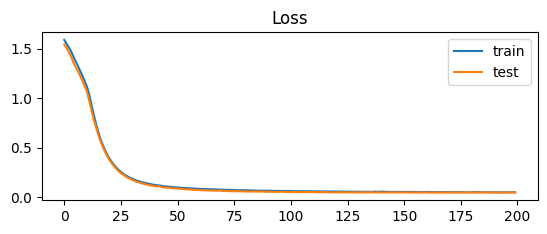

In [98]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show

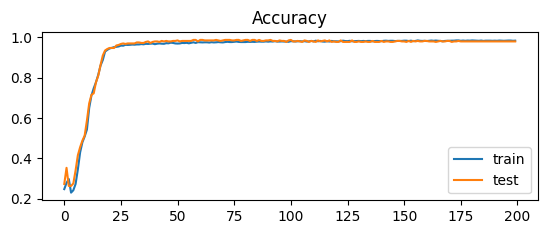

In [99]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()